In [1]:
from methods import *
import matplotlib.pyplot as plt
from PIL import Image

# Obtener los datos de la tabla

Cómo obtener la tabla de asistencia

In [2]:
f3 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato3.pdf"
f3_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 3/10749/Abril.pdf"

In [3]:
doc = fitz.open(f3_error)
list_blocks = get_info_in_blocks(doc)

In [4]:
parse_blocks(list_blocks)
list_blocks

['15/12/22, 14:21 .:SIGE:. Ministerio de Educación',
 'https://sige.mineduc.cl/Sige/Sep/IngresoAsistenciaSep 2/2',
 'Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S   1 2 3 4 5 6 7 8 9 1011 12131415161718192021222324252627282930A',
 '1  Aguirre Tenorio Angelo',
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 1,
 0,
 -1,
 '5',
 '2  Arias Astudillo Ignacia',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 0,
 -1,
 '13',
 '3  Astete Peñaloza Juan',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '16',
 '4  Astudillo Acosta Efraín',
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 '1',
 '5  Bravo Pavez Andy',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1

In [5]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
print("")

meta_data = []
i = 0
while i < len(raw_data):
    element: list[str|int] = raw_data[i]
    if element != []:
        if element[0].isnumeric() or element[0] in ["-1","-2","-3","-5""]:
            if len(element) == 1:
                meta_data.append(int(element[0]))
            elif element[1].isalpha():
                meta_data.append(" ".join(element[1:]))
    i += 1

print(meta_data)

SyntaxError: unterminated string literal (detected at line 13) (2066511685.py, line 13)

In [ ]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
print("")
a = " ".join(list(map(lambda x: " ".join(x),raw_data))).split()

# Encuentra donde inicia los datos de la tabla
c = 0
for i,value in enumerate(a):
    if value.isnumeric() and a[i+1].isalpha():
        if int(value) == 1:
            c+=i
            break
matrix = {}
data = []
name = []
n_days = 30

for value in a[(c+1):]:
    
    if len(data) == n_days:
        matrix[" ".join(name.copy())] = np.array(data.copy())
        name.clear()
        data.clear()    
    
    elif len(name) != 0 and value in ["-5","-3","-2","-1","0","1"]:
        data.append(value)
    
    elif value.isalpha() and value not in ["-5","-3","-2","-1"]:
        name.append(value)
    
k =pd.DataFrame(matrix).T
k.columns = 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Aguirre Tenorio Angelo,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,1,0,-1
Arias Astudillo Ignacia,1,-1,-1,1,1,1,1,1,-1,-1,...,0,0,-1,-1,1,0,0,0,0,-1
Astete Peñaloza Juan,1,-1,-1,1,1,1,1,0,-1,-1,...,0,1,-1,-1,1,1,1,1,1,-1
Astudillo Acosta Efraín,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,0,0,-1
Bravo Pavez Andy,1,-1,-1,1,1,1,1,1,-1,-1,...,1,0,-1,-1,1,1,1,1,1,-1
Bustos Apolinario Alondra,1,-1,-1,1,1,1,1,1,-1,-1,...,1,1,-1,-1,1,1,0,1,1,-1
Cáceres Armijo Lucas,1,-1,-1,1,1,1,1,1,-1,-1,...,0,1,-1,-1,0,0,0,0,0,-1
Carrasquero Matos Fabiola,0,-1,-1,0,1,1,1,0,-1,-1,...,1,0,-1,-1,1,1,0,1,0,-1
Cayuqueo Labrín Florencia,1,-1,-1,1,1,1,0,0,-1,-1,...,0,0,-1,-1,0,0,0,0,0,-1
Contreras Garcia Lirimar,1,-1,-1,0,1,1,1,1,-1,-1,...,1,1,-1,-1,1,0,0,1,1,-1


In [ ]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
print("")


pd.DataFrame(matrix_dict).T            

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Aguirre Tenorio Angelo,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,1,0,-1
Arias Astudillo Ignacia,1,-1,-1,1,1,1,1,1,-1,-1,...,0,0,-1,-1,1,0,0,0,0,-1
Astete Peñaloza Juan,1,-1,-1,1,1,1,1,0,-1,-1,...,0,1,-1,-1,1,1,1,1,1,-1
Astudillo Acosta Efraín,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,0,0,-1
Bravo Pavez Andy,1,-1,-1,1,1,1,1,1,-1,-1,...,1,0,-1,-1,1,1,1,1,1,-1
Bustos Apolinario Alondra,1,-1,-1,1,1,1,1,1,-1,-1,...,1,1,-1,-1,1,1,0,1,1,-1
Cáceres Armijo Lucas,1,-1,-1,1,1,1,1,1,-1,-1,...,0,1,-1,-1,0,0,0,0,0,-1
Carrasquero Matos Fabiola,0,-1,-1,0,1,1,1,0,-1,-1,...,1,0,-1,-1,1,1,0,1,0,-1
Cayuqueo Labrín Florencia,1,-1,-1,1,1,1,0,0,-1,-1,...,0,0,-1,-1,0,0,0,0,0,-1
Contreras Garcia Lirimar,1,-1,-1,0,1,1,1,1,-1,-1,...,1,1,-1,-1,1,0,0,1,1,-1


In [ ]:
# Si la lista esta bien creada
dict_tabla: dict[str, np.ndarray] = dict()
list_aux = []
key_aux = ""
for value in meta_data:
    if type(value) == int:
        list_aux.append(value)
    elif type(value) == str:
        if key_aux == "":
            key_aux = value
        else:
            dict_tabla[key_aux] = np.array(list_aux.copy(), dtype="int8")
            list_aux.clear()
            key_aux = value
for key, value in dict_tabla.items():
    dict_tabla[key] = np.delete(value,-1)
print(dict_tabla)

NameError: name 'meta_data' is not defined

In [ ]:
# Confirmamos que la tabla sea cuadrada
try:
    df = pd.DataFrame(dict_tabla)
    print(df)
    if np.unique(df.count().to_numpy()).shape[0] == 1:
        print( np.unique(df.count().to_numpy()))
        df = df.T
        df.columns = np.array([date(2022, 4, 1)+timedelta(days=i)
                              for i in range(PARSE_STR_MONTH_TO_DATA["Abril"][1])])
    else:
        print("error")
except:
    list_error = []
    for x in dict_tabla.values():
        list_error.append(x.shape[0])
    print(set(list_error))

Empty DataFrame
Columns: []
Index: []
error


In [ ]:
df

""


# Formato 2

In [145]:
f2 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato2.pdf"
f2_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 2/10087/Abril.pdf"

In [146]:
doc = fitz.open(f2_error)
list_blocks = get_info_in_blocks(doc)
parse_blocks(list_blocks)

def slice_for_word(lista:list[str|int] ,word:str)->list[list[str|int]]:
    for i, value in enumerate(lista):
        if type(value) == int:
            continue
        if word in value:
            return [lista[:i],lista[i:]]
                 
a, b = slice_for_word(list_blocks,"Alumnos")

In [148]:
standard_table(b,"Abril")

{}

# Formato 1

In [ ]:
f1 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato1.pdf"
f1_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 1/10270/abril__SIGE_. Ministerio de Educación.pdf"

In [ ]:
doc = fitz.open(f1_error)
list_blocks = get_info_in_blocks(doc)
parse_blocks(list_blocks)
a, b = slice_for_word(list_blocks,"Detalle")
c, d = slice_for_word(b,"Alumnos")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x81\x00\x00\x00v\x08\x02\x00\x00\x00`Ug\xa6\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x14\\IDATx\x9c\xed\x9d}lT\xe7\x95\xc6\xadv\xff\xd8\xaaR+\xb5\xfb\xa1U+Uj\xd4VYU\xc8\xb11c\xbc,\xa0\xddB\x10\xd9\xcd\xd6 \'5k\x07\xbc\x0e\x84$\x149\xcd\x92d\xa3F\x89\x9a\x14\x05"(j\x12%ip\xc0\x08\xb2\x81-t\x02\x06\x9b\xf0e>\x85\xa9\x03a\xf3U\xcc\xda\xb8&\xe3a\xec\xf1\xd8c\xcfx<\x9e\x19\xb3\xbfs\xcf\xf506\xfe\x18\x83\x93\x0b\xf1\x8b\x8eF\xf7\xbe\xf7\xbd\xef\xbd\xf3<\xe7<\xe7\x9c;F7\xe3\xeb\x8f\xee\xcb(q\xdf\x9a\xf6\x8fE\xafz3\xb3\xbcwe\x7f\xbe\xf6\x05\\bd\x0b<\xb2"\xe3\xaf\x1e\xdf\xff\x95\xe5{nA\xcbx\xa4\x1a\x0e\x02\xd3\xa7\xfb\xf2\xfe\xe1J\xde\x8c/\xabu\xfc\xe2?\r\x07\x86\x03\xc3\xc1\x04r\x90\xb1lO\xc6\x83\xbbm)_\xecf\xdbp\x90>\x07\xd5#\x03Q\x99\x1e^\x95 Nn\xff\xfb_\x1e\xfe\x97\r\xa7\xd7W_\xfcue\xfd\x0f\x9e>t\x934\x18\x0e\xc6\xe7\xfb\xd9\xbf:\xfaIs\xa7?\x18ih\t^\xb5\xfe\xbd\xfb~KF\xa9u\x14[f8\x18\x83\x83\x1b\xd4"!`\xd9\x

In [ ]:
d

['Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S   1 2 3 4 5 6 7 8 9 1011 12131415161718192021222324252627282930A',
 '1  Arredondo López Dominique',
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 '12',
 '2  Arredondo Valle Antonia',
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 0,
 1,
 1,
 0,
 0,
 -1,
 '14',
 '29/12/22, 10:38 .:SIGE:. Ministerio de Educación',
 'https://sige.mineduc.cl/Sige/Sep/IngresoAsistenciaSep 2/2',
 'Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S   1 2 3 4 5 6 7 8 9 1011 12131415161718192021222324252627282930A',
 '3  Barbera Martinez Angel',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '19',
 '4  Cabello Avendaño Máximo',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,


In [ ]:
# Clean list data of unless data
raw_data = list(map(lambda x: str(x).split(), d))
meta_data = []
i = 0
while i < len(raw_data):
    element: list[str] = raw_data[i]
    if element != []:
        if element[0].isnumeric() or element[0] in ["-1","-2","-3"]:
            if len(element) == 1:
                meta_data.append(int(element[0]))
            elif element[1].isalpha():
                meta_data.append(" ".join(element[1:]))
    i += 1

meta_data    
#dict_tabla: dict[str, np.ndarray] = dict()
#list_aux: list[int] = []
#key_aux: str = ""
#for value in meta_data:
#    if type(value) == int:
#        list_aux.append(value)
#    elif type(value) == str:
#        if key_aux == "":
#            key_aux = value
#        else:
#            dict_tabla[key_aux] = np.array(list_aux.copy(), dtype="int8")
#            list_aux.clear()
#            key_aux = value
#for key, value in dict_tabla.items():
#    dict_tabla[key] = np.delete(value,-1)


[1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -

In [ ]:
o = parse_format3(d,9993,"Octubre")
o

5
6


,RBD


# Ver imagenes apartir de sus bytes 

In [12]:
matrix = np.random.randint(0, 255, (4, 4, 3), dtype=np.int16)
b = matrix.tobytes("F")
b

b'r\x00\x90\x00a\x00\x95\x00+\x00?\x00\xbe\x00\xf0\x00\xc8\x00\xc6\x00\xb9\x00\xe9\x00\xa0\x00!\x00\x18\x00J\x00^\x00&\x00\xdf\x00E\x00\xdc\x00\r\x00\xba\x00^\x00\x92\x00\xae\x00\t\x00\xa8\x000\x00_\x00\x03\x00J\x00t\x00\xaf\x00\xae\x00\x85\x00t\x00\xd7\x00\xb4\x00v\x00\xcc\x00w\x00q\x00\xda\x00L\x00\xc5\x00\x04\x00\x9f\x00'

In [13]:
Image.open(io.BytesIO(b))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000174AC526890>

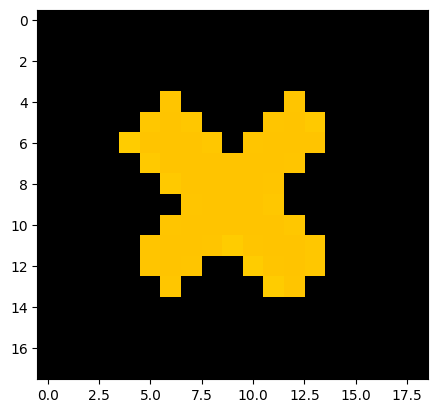

In [82]:
bytes_img1 = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x13\x00\x00\x00\x12\x08\x02\x00\x00\x006nr>\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x00]IDATx\x9cc`\x18\xb1\xe0\xffQ\xc2"\xd8\xb4\x1dg\xf8\x7f\x04D"k\x03\x89\x9c\xc4\xaf\xed\x0cX\xd1\x11\x84f\xa860"d\xe7I$\xcdpD\x8ck\xb1h&R\x1bT\xf3Qtg\x93\xae\x8dx\xcd\x08mG\xc1\x01v\x94h\xcdP\xa50\xbf!4\x13e\xed1T\xee\x19\x12\x03i\x98\x01\x00t\x1em\x90\xd7l-\x97\x00\x00\x00\x00IEND\xaeB`\x82'
img =  Image.open(io.BytesIO(bytes_img1))
plt.imshow(img)

In [5]:
h,w,_ = np.asarray(img).shape

(18, 19, 3)

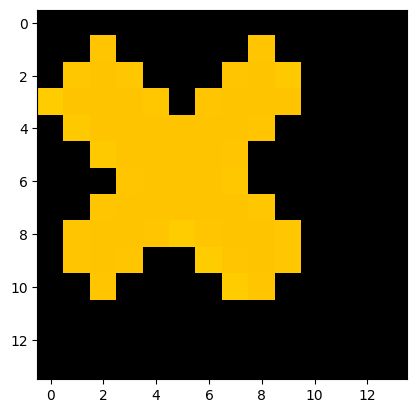

In [83]:
i = 3
j = 4
plt.imshow(np.asarray(img)[i:(i+14),j:(j+14),:])

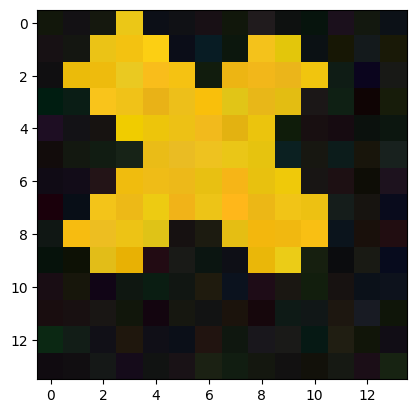

In [164]:
num_aux = np.random.randint(7,dtype=np.int32)
img =  Image.open(io.BytesIO(bytes_img1))
img_array =  np.asarray(img)
aux = np.random.binomial(n=256,p=0.5,size=img_array.shape)

aux2 = img_array + aux



plt.imshow(((aux2-aux2.min())/(aux2.max()-aux2.min()))[i:14+i,j:14+j,:])

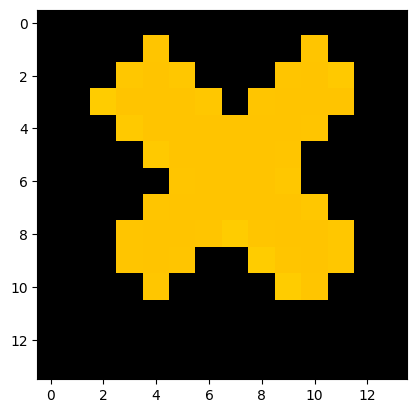

In [81]:
import imagenes
img = Image.open(io.BytesIO(imagenes.images["ausente"][0]))
i = 3
j = 2
plt.imshow(np.asarray(img)[i:14+i,j:14+j,:])

In [166]:
isinstance(0,int)

True